In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1", engine='python')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

## check missing values for each column


In [7]:
np.sum(df.isna(),axis=0).sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

# check out the rows with missing values



In [8]:
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


# change the invoice_date format - String to Timestamp format


In [33]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate)

In [34]:
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df['month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df['date'] = pd.to_datetime(df['InvoiceDate']).dt.day

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1


# df_new without missing values


In [12]:
df_new = df.dropna()

# check missing value for each column

In [13]:
np.sum(df_new.isna(),axis=0).sort_values(ascending=False)

date           0
month          0
Year           0
Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Year         406829 non-null  int64         
 9   month        406829 non-null  int64         
 10  date         406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 37.2+ MB


# change columns tyoe - String to Int type 


In [15]:
df_new['CustomerID'] = df_new['CustomerID'].astype('int64')

C:\Users\ASK Computers\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
 8   Year         406829 non-null  int64         
 9   month        406829 non-null  int64         
 10  date         406829 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 37.2+ MB


In [17]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID,Year,month,date
count,406829.00,406829.00,406829.00,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69,2010.93,7.61,15.04
std,248.69,69.32,1713.60,0.25,3.42,8.65
min,-80995.00,0.00,12346.00,2010.00,1.00,1.00
25%,2.00,1.25,13953.00,2011.00,5.00,7.00
50%,5.00,1.95,15152.00,2011.00,8.00,15.00
75%,12.00,3.75,16791.00,2011.00,11.00,22.00
max,80995.00,38970.00,18287.00,2011.00,12.00,31.00


# Remove Quantity with negative values¶

In [18]:
df_new = df_new[df_new.Quantity > 0]

In [19]:
df_new.describe().round(2)

,Quantity,UnitPrice,CustomerID,Year,month,date
count,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32,2010.93,7.61,15.04
std,180.42,22.10,1713.17,0.25,3.42,8.65
min,1.00,0.00,12346.00,2010.00,1.00,1.00
25%,2.00,1.25,13969.00,2011.00,5.00,7.00
50%,6.00,1.95,15159.00,2011.00,8.00,15.00
75%,12.00,3.75,16795.00,2011.00,11.00,22.00
max,80995.00,8142.75,18287.00,2011.00,12.00,31.00


# Add the column amount_spent

In [20]:
df_new['Revenue'] = df_new['Quantity'] * df_new['UnitPrice']

In [22]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month,date,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011,12,9,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011,12,9,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011,12,9,16.60


In [23]:
df_new['MonthlyDetails'] = df_new['month'].sort_values().apply(str) + '_' +  df_new['Year'].sort_values().apply(str)

In [24]:
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,month,date,Revenue,MonthlyDetails
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,15.30,12_2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34,12_2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,22.00,12_2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34,12_2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,20.34,12_2010


In [25]:
groupby_Monthlydeails_Revenue=df_new.groupby(['MonthlyDetails'])['Revenue'].sum()

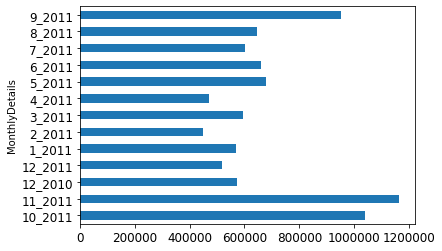

In [26]:
# plt.subplots()
groupby_Monthlydeails_Revenue.plot(kind='barh', fontsize=12)
# plt.xlabel('Money Spent (Dollar)', fontsize=12)
# plt.ylabel('Country', fontsize=12)
# plt.title('Money Spent by different Countries', fontsize=12)
# plt.show()

In [27]:
%matplotlib inline
color = sns.color_palette()


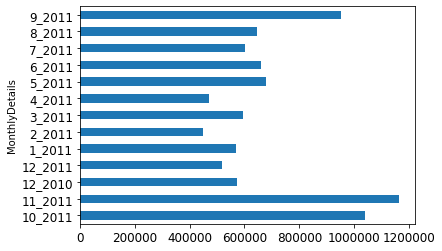

In [31]:
groupby_Monthlydeails_Revenue.plot(kind='barh', fontsize=12,color=color[0])

# ### How many orders made by the customer in each country

In [32]:
df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

,CustomerID,Country,InvoiceNo
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


In [35]:
df_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Year', 'month', 'date',
       'Revenue', 'MonthlyDetails'],
      dtype='object')

In [37]:
df_new1 = df_new.drop(['Description','InvoiceDate'], axis=1)

In [38]:
df_new1


,InvoiceNo,StockCode,Quantity,UnitPrice,CustomerID,Country,Year,month,date,Revenue,MonthlyDetails
0,536365,85123A,6,2.55,17850,United Kingdom,2010,12,1,15.30,12_2010
1,536365,71053,6,3.39,17850,United Kingdom,2010,12,1,20.34,12_2010
2,536365,84406B,8,2.75,17850,United Kingdom,2010,12,1,22.00,12_2010
3,536365,84029G,6,3.39,17850,United Kingdom,2010,12,1,20.34,12_2010
4,536365,84029E,6,3.39,17850,United Kingdom,2010,12,1,20.34,12_2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,12,0.85,12680,France,2011,12,9,10.20,12_2011
541905,581587,22899,6,2.10,12680,France,2011,12,9,12.60,12_2011
541906,581587,23254,4,4.15,12680,France,2011,12,9,16.60,12_2011
541907,581587,23255,4,4.15,12680,France,2011,12,9,16.60,12_2011


In [49]:
!pip install sweetviz

  Using cached sweetviz-1.0a7-py3-none-any.whl (323 kB)
  Using cached importlib_resources-3.0.0-py2.py3-none-any.whl (23 kB)
  Using cached tqdm-4.47.0-py2.py3-none-any.whl (66 kB)
  Using cached pandas-1.0.5-cp37-cp37m-win_amd64.whl (8.7 MB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.42.1
    Uninstalling tqdm-4.42.1:
      Successfully uninstalled tqdm-4.42.1
  Attempting uninstall: pandas
    Found existing installation: pandas 0.25.0
    Uninstalling pandas-0.25.0:
      Successfully uninstalled pandas-0.25.0


In [50]:
import sweetviz as sv

my_report = sv.analyze(df_new1)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

:FEATURES DONE:                    |                     | [  0%]   00:30  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:19  -> (00:00 left)


Creating Associations graph... DONE!
